# **Overview Kompetisi Deteksi Fraud pada Platform Fintech**

### Pendahuluan

<div font="" style="text-align: justify">Dalam kompetisi ini, tujuan utama adalah mengembangkan model machine learning yang mampu mendeteksi fraud pada pengguna platform fintech. Fraud detection adalah proses identifikasi tindakan pengguna yang termasuk sebagai tindakan penipuan. Dalam konteks kompetisi ini, tindakan penipuan didefinisikan sebagai pengguna platform yang telah meminjam produk keuangan tetapi tercatat belum melakukan pembayaran sampai tenggat waktu yang telah ditentukan.</div>

### Deskripsi Data

<div style="text-align: justify">Data kompetisi ini diambil dari catatan peminjaman produk keuangan pada salah satu perusahaan fintech. Dataset kompetisi berisi lima berkas csv dengan detail sebagai berikut:</div>

1. **train.csv** - Data berisi data pengguna untuk training model.
    - `user_id`: ID pengguna.
    - `pc[0-16]`: Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.
    - `label`: Target klasifikasi pengguna (0: Non-fraud; 1: Fraud).

2. **loan_activities.csv** - Data berisi catatan peminjaman produk keuangan pada platform.
    - `user_id`: ID pengguna.
    - `reference_contact`: Pengguna lain yang dijadikan kontak darurat.
    - `loan_type`: Tipe pinjaman yang dipesan oleh pengguna.
    - `ts`: Timestamp saat pengguna membuat pinjaman.

3. **non_borrower_user.csv** - Data berisi data pengguna yang tidak dijadikan target klasifikasi karena cenderung jarang melakukan pinjaman.
    - `user_id`: ID pengguna.
    - `pc[0-16]`: Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.

4. **test.csv** - Data berisi data pengguna untuk dilakukan prediksi pada submisi.
    - `user_id`: ID pengguna yang bersesuaian dengan sample_submission.csv.
    - `pc[0-16]`: Kumpulan fitur identitas pengguna yang sengaja dikaburkan untuk anonimitas.

5. **sample_submission.csv** - Data berisi contoh submisi.
    - `user_id`: ID pengguna yang bersesuaian dengan test.csv.
    - `label`: Target klasifikasi pengguna (0: Non-fraud; 1: Fraud).

Kompetisi dapat diakses pada https://www.kaggle.com/competitions/ristek-datathon-2024 (invited only 😂)

# **Analisis**

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import jieba
# from tqdm.notebook import tqdm

# import matplotlib.pyplot as plt

from IPython.display import display, HTML
import io

# import itertools
# from collections import defaultdict

# import spacy
# from spacy.tokens import Doc
# from spacy import displacy
# from scipy.sparse import coo_matrix

# import networkx as nx
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# import dgl
# from dgl.data import DGLDataset
# from dgl.dataloading import GraphDataLoader
# import dgl.nn.pytorch as dglnn
# from dgl.nn import SAGEConv

# from sklearn.metrics import average_precision_score

# import gc

| Library | Tujuan |
| ------- | ------ |
| `pandas` | Menyediakan struktur data dan alat analisis data, penting untuk memanipulasi dan menggunakan data terstruktur secara efisien. |
| `numpy` | Digunakan untuk operasi numerik pada array, mendukung array dan matriks multi-dimensi besar bersama dengan fungsi matematika tingkat tinggi. |
| `seaborn` | Digunakan untuk menyediakan antarmuka tingkat tinggi untuk grafik statistik yang menarik. |
| `jieba` | Library segmentasi teks bahasa Mandarin untuk tugas pemrosesan bahasa alami. |
| `tqdm` | Menampilkan bilah kemajuan untuk proses iteratif, meningkatkan pengalaman pengguna dalam loop yang memakan waktu lama. |
| `matplotlib` | Digunakan untuk visualisasi data. Menawarkan opsi kustomisasi untuk membuat visualisasi statis, animasi, dan interaktif. |
| `IPython.display` | Menyediakan fungsi untuk menampilkan HTML dan elemen interaktif di Jupyter Notebook. |
| `io` | Menyediakan alat untuk menangkap output stream, seperti menangkap output dari fungsi yang biasanya menulis ke stdout. |
| `itertools` | Menyediakan fungsi untuk membuat iterator untuk looping yang efisien dan menggabungkan elemen dari beberapa iterables. |
| `collections` | Kamus khusus dari modul collections yang menyediakan nilai default untuk kunci yang belum diatur. |
| `spacy` | Library NLP digunakan untuk tokenisasi, parsing, pengenalan entitas, dan lemmatisasi. |
| `scipy` | Menyediakan representasi matriks jarang menggunakan format Coordinate list (COO) untuk penanganan matriks besar yang efisien. |
| `networkx` | Library untuk membuat, memanipulasi, dan mempelajari jaringan (graf) kompleks dari node dan edge. |
| `torch` | Library komputasi ilmiah dengan dukungan untuk komputasi tensor dan diferensiasi otomatis untuk membangun dan melatih jaringan saraf. |
| `dgl` | Deep Graph Library untuk membangun, melatih, dan mengevaluasi jaringan saraf graf (GNNs). |
| `sklearn` | Fungsi metrik untuk menghitung skor presisi rata-rata untuk mengevaluasi kinerja model dalam tugas pencarian informasi. |
| `gc` | Modul pengumpulan sampah di Python untuk mengelola alokasi dan dealokasi memori. |


### Loading Datasets

In [2]:
train = pd.read_csv("datathon-2024/ristek-datathon-2024/ristek-datathon-2024/train.csv")
test = pd.read_csv("datathon-2024/ristek-datathon-2024/ristek-datathon-2024/test.csv")
loan = pd.read_csv("datathon-2024/ristek-datathon-2024/ristek-datathon-2024/loan_activities.csv")
non_borrow =  pd.read_csv("datathon-2024/ristek-datathon-2024/ristek-datathon-2024/non_borrower_user.csv")
sample = pd.read_csv("datathon-2024/ristek-datathon-2024/ristek-datathon-2024/sample_submission.csv")

### Pemahaman Format Data

In [3]:
def display_head(df, name):
    return df.head().style.set_caption(name)._repr_html_()

loan_head = display_head(loan, 'Loan Activities Dataset')
sample_head = display_head(sample, 'Sample Submission')

combined_head_html = f"<div style='display:flex; margin-bottom:20px;'>{loan_head}<div style='margin-left:20px;'>{sample_head}</div></div>"
display(train.head().style.set_caption('Train Dataset'))
display(test.head().style.set_caption('Test Dataset'))
display(non_borrow.head().style.set_caption('Non Borrower User Dataset'))
display(HTML(combined_head_html))

,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,label
0,3,1.000000,1.000000,0.275000,0.255000,0.927273,0.400000,0.260000,0.040000,0.254000,0.976923,1.000000,0.072727,0.023077,0.078431,0.750000,0.018182,0.250000,0
1,5,0.000000,0.000000,0.430000,0.365000,0.848837,0.400000,1.253000,0.210000,1.235000,0.985634,1.000000,0.151163,0.014366,0.054795,0.500000,0.011628,0.250000,0
2,9,1.000000,3.000000,1.315000,0.825000,0.627376,0.900000,2.385000,0.128000,2.270000,0.951782,1.000000,0.372624,0.048218,0.054545,0.777778,0.003802,0.111111,0
3,10,0.000000,5.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,17,1.000000,1.000000,0.235000,0.160000,0.680851,0.100000,0.120000,0.002000,0.104000,0.866667,0.000000,0.319149,0.133333,0.031250,-1.000000,-1.000000,-1.000000,0


,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,4,1.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,13,1.000000,5.000000,0.445000,0.420000,0.943820,0.800000,0.783000,0.234000,0.778000,0.993614,2.000000,0.056180,0.006386,0.095238,0.750000,0.022472,0.250000
2,37,1.000000,6.000000,1.680000,1.080000,0.642857,0.600000,1.167000,0.046000,1.007000,0.862896,1.000000,0.357143,0.137104,0.027778,0.500000,0.002976,0.166667
3,61,0.000000,3.000000,1.505000,0.875000,0.581395,0.900000,0.425000,0.012000,0.286000,0.672941,1.000000,0.418605,0.327059,0.051429,0.333333,0.003322,0.111111
4,66,1.000000,5.000000,2.210000,1.075000,0.486425,1.000000,1.349000,0.087000,1.015000,0.752409,2.000000,0.513575,0.247591,0.046512,0.800000,0.004525,0.200000


,user_id,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16
0,0,1,5,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,1,0,8,0.630000,0.565000,0.896825,0.600000,2.298000,0.210000,2.284000,0.993908,1,0.103175,0.006092,0.053097,1.000000,0.007937,0.166667
2,2,-1,-1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,6,0,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,7,1,6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


<div font="" style="text-align: justify">Dengan melihat 5 row teratas (head) dari masing - masing dataset, kami dapat menyimpulkan bahwa kami membutuhkan analisis lebih lanjut untuk mengungkap pola penting pada fitur - fitur identitas yang sengaja dikaburkan pada `train` dan `test` datasets. Namun, kami dapat berasumsi berdasarkan domain knowledge bahwa fitur - fitur tersebut adalah sekedar identitas dari user tersebut saja, seperti gender, kelompok usia, alamat atau daerah tinggal, dan lain - lain.</div>

In [4]:
def get_info_html(df, name):
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    return f"<div style='display:inline-block; vertical-align:top; margin-right:20px;'><h3>{name}</h3><pre style='font-size:10px;'>{info_str}</pre></div>"

train_info = get_info_html(train, "Train Dataset")
test_info = get_info_html(test, "Test Dataset")
loan_info = get_info_html(loan, "Loan Activities Dataset")
non_borrow_info = get_info_html(non_borrow, "Non-Borrower User Dataset")
sample_info = get_info_html(sample, "Sample Submission")

combined_html = f"<div style='white-space:nowrap; margin-bottom:20px;'>{train_info}{test_info}{non_borrow_info}{loan_info}{sample_info}</div>"

display(HTML(combined_html))

<div font="" style="text-align: justify">Beberapa hal yang dapat disimpulkan dari melihat informasi dari dataset semata adalah tidak ada missing values dalam setiap kolom di setiap dataset. Ini terlihat dari jumlah Non-Null Count yang sama dengan jumlah total entri di setiap dataset. Dengan melihat ke header dataset cell diatas juga dapat disimpulkan bahwa jikalaupun ada missing values dalam dataset, maka sudah di-impute dengan nilai -1 oleh pihak panitia, sehingga tidak ada nilai yang secara eksplisit ditandai sebagai NaN atau null.</div>

In [5]:
# Menampilkan jumlah nilai unik dari setiap kolom dalam dataset
def display_nunique_values(df, name):
    nunique_values = df.nunique()
    nunique_values_str = "<br>".join([f"<b>{col}</b>: {nunique_values[col]}" for col in df.columns])
    return f"<div style='display:inline-block; vertical-align:top; margin-right:20px;'><h3>{name}</h3><pre style='font-size:10px;'>{nunique_values_str}</pre></div>"

# Mendapatkan string HTML untuk setiap dataframe
train_nunique = display_nunique_values(train, "Train Dataset")
test_nunique = display_nunique_values(test, "Test Dataset")
loan_nunique = display_nunique_values(loan, "Loan Activities Dataset")
non_borrow_nunique = display_nunique_values(non_borrow, "Non-Borrower User Dataset")
sample_nunique = display_nunique_values(sample, "Sample Submission Dataset")

# Menggabungkan string HTML menjadi satu tampilan
combined_nunique_html = f"<div style='white-space:nowrap;'>{train_nunique}{test_nunique}{non_borrow_nunique}{loan_nunique}{sample_nunique}</div>"

# Menampilkan HTML gabungan
display(HTML(combined_nunique_html))

<div font="" style="text-align: justify">Dengan memahami dataset, ada satu hal menarik yang kami dapat simpulkan, dimana kami cukup yakin bahwa fitur `pc0` merupakan fitur yang berisi informasi gender dari user. Jika asumsi kami ini benar, maka kami berpendapat untuk melakukan drop fitur ini, dengan alasan bahwa karena ada nilai `-1` yang berarti user dapat tidak mengisi fitur ini, maka berarti tidak ada pengecekan kembali dari perusahaan Fintech tersebut mengenai fitur ini, yang berarti data dapat dengan mudah dimanipulasi oleh user. Data yang dapat dimanipulasi oleh pengguna tidak dapat diandalkan dan dapat memberikan informasi yang menyesatkan.</div>

### Interpretasi Data

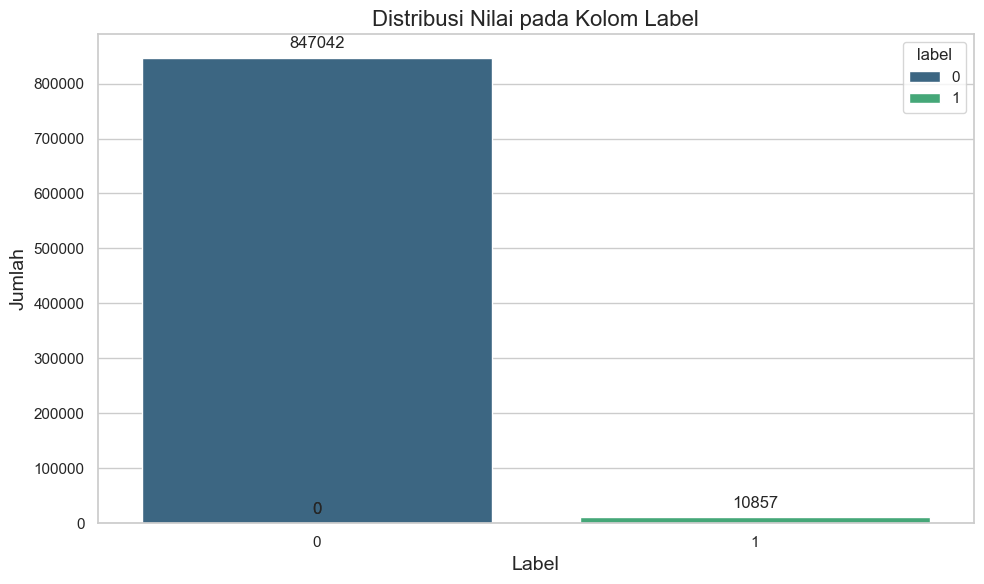

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
count_plot = sns.countplot(x='label', hue='label', data=train, palette="viridis")

plt.title('Distribusi Nilai pada Kolom Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 10), 
                        textcoords = 'offset points', fontsize=12)

plt.tight_layout()
plt.show()

<div font="" style="text-align: justify">Terlihat pada data jumlah data fraud dan non fraud sangatlah imbalance. Banyaknya data dengan label 0 (non-fraud) adalah 847042 dan banyaknya data dengan label 1(fraud) adalah 10857. Pada dataset yang bertemakan "fraud" merupakan hal yang wajar bahwa data dipunya bersifat imbalance</div>

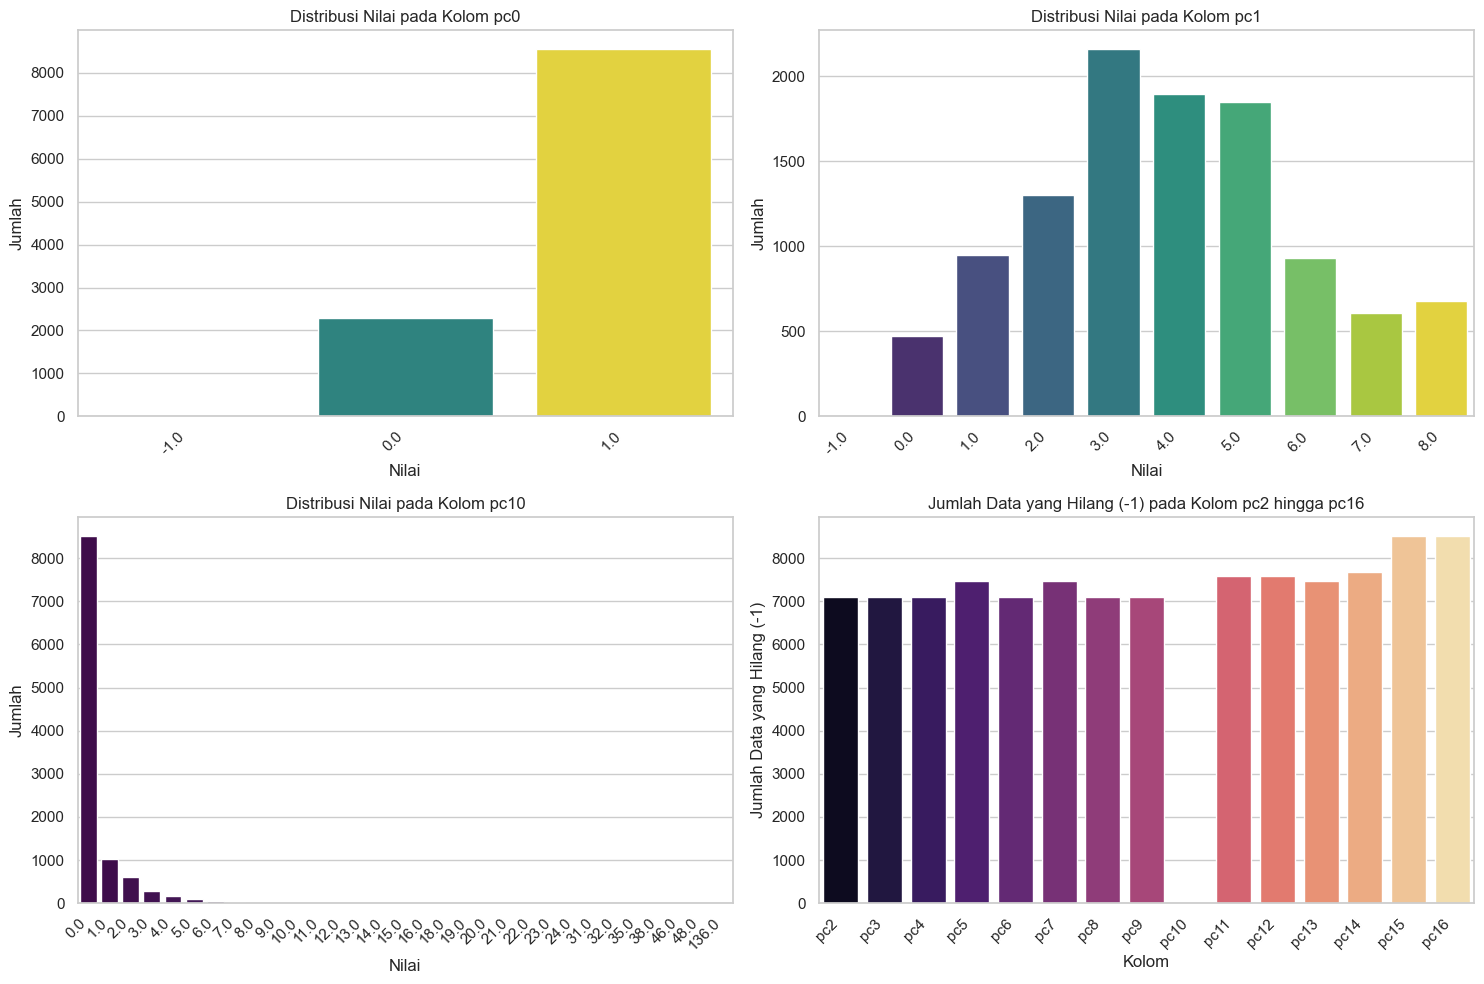

In [7]:
sns.set(style="whitegrid")

df = train.copy()
fraud = df[df['label'] == 1]
fraud = fraud.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in zip([0, 1, 10], axes.flatten()[:3]):
    column_name = f'pc{i}'
    value_counts = fraud[column_name].value_counts().sort_index().reset_index()
    value_counts.columns = ['index', 'count']
    sns.barplot(x='index', y='count', data=value_counts, ax=ax, palette="viridis", hue='index', dodge=False, legend=False)
    ax.set_title(f'Distribusi Nilai pada Kolom {column_name}')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Jumlah')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts['index'], rotation=45, ha='right')

missing_counts = []
columns = []

for i in range(2, 17):
    column_name = f'pc{i}'
    count = (fraud[column_name] == -1).sum()
    missing_counts.append(count)
    columns.append(column_name)

missing_counts_df = pd.DataFrame({'column': columns, 'count': missing_counts})

sns.barplot(x='column', y='count', data=missing_counts_df, ax=axes.flatten()[3], palette="magma", hue='column', dodge=False, legend=False)
axes.flatten()[3].set_title('Jumlah Data yang Hilang (-1) pada Kolom pc2 hingga pc16')
axes.flatten()[3].set_xlabel('Kolom')
axes.flatten()[3].set_ylabel('Jumlah Data yang Hilang (-1)')
axes.flatten()[3].set_xticks(range(len(columns)))
axes.flatten()[3].set_xticklabels(columns, rotation=45, ha='right')

if len(axes.flatten()) > 4:
    fig.delaxes(axes.flatten()[4])

plt.tight_layout()
plt.show()

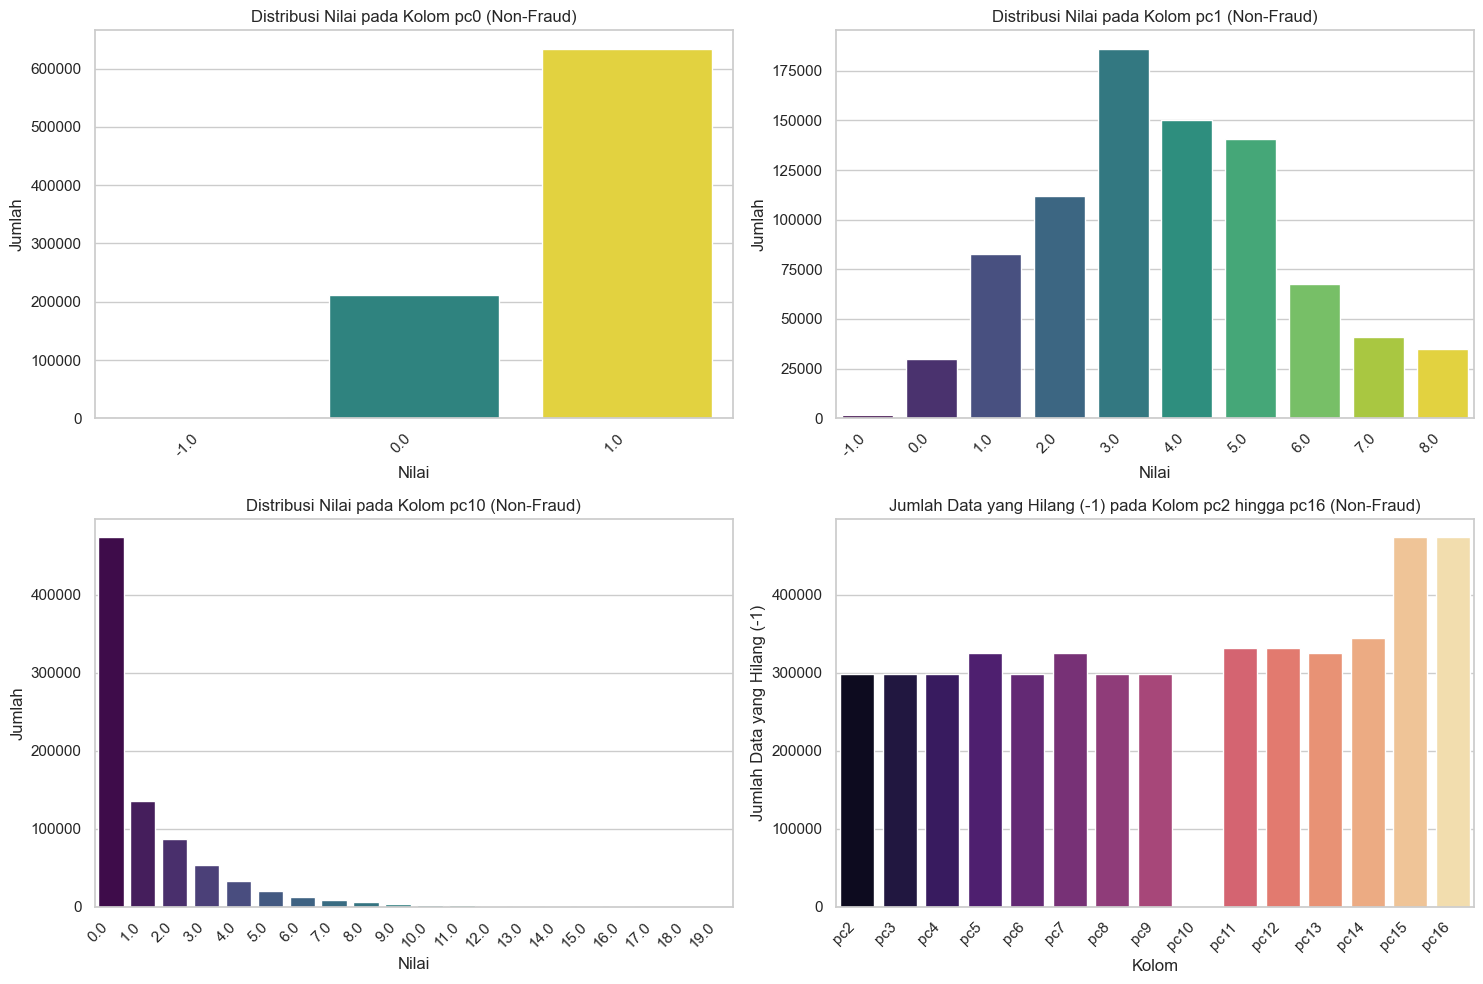

In [8]:
sns.set(style="whitegrid")

df2 = train.copy()
non_fraud = df2[df2['label'] == 0]
non_fraud = non_fraud.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in zip([0, 1, 10], axes.flatten()[:3]):
    column_name = f'pc{i}'
    value_counts = non_fraud[column_name].value_counts().sort_index().reset_index()
    value_counts.columns = ['index', 'count']
    top_values = value_counts.head(20)  
    sns.barplot(x='index', y='count', data=top_values, ax=ax, palette="viridis", hue='index', dodge=False, legend=False)
    ax.set_title(f'Distribusi Nilai pada Kolom {column_name} (Non-Fraud)')
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Jumlah')
    ax.set_xticks(range(len(top_values)))
    ax.set_xticklabels(top_values['index'], rotation=45, ha='right')

missing_counts = []
columns = []

for i in range(2, 17):
    column_name = f'pc{i}'
    count = (non_fraud[column_name] == -1).sum()
    missing_counts.append(count)
    columns.append(column_name)

missing_counts_df = pd.DataFrame({'column': columns, 'count': missing_counts})

sns.barplot(x='column', y='count', data=missing_counts_df, ax=axes.flatten()[3], palette="magma", hue='column', dodge=False, legend=False)
axes.flatten()[3].set_title('Jumlah Data yang Hilang (-1) pada Kolom pc2 hingga pc16 (Non-Fraud)')
axes.flatten()[3].set_xlabel('Kolom')
axes.flatten()[3].set_ylabel('Jumlah Data yang Hilang (-1)')
axes.flatten()[3].set_xticks(range(len(columns)))
axes.flatten()[3].set_xticklabels(columns, rotation=45, ha='right')

if len(axes.flatten()) > 4:
    fig.delaxes(axes.flatten()[4])

plt.tight_layout()
plt.show()

1. Kolom `pc0`:
Nilai pada kolom `pc0` hanya bernilai 0 dan 1 (atau -1). Ini menunjukkan bahwa kolom `pc0` merupakan hasil label encoding dari gender. Nilai 0 mungkin mewakili satu jenis kelamin (misalnya laki-laki), dan nilai 1 mewakili jenis kelamin lainnya (misalnya perempuan).
Mayoritas data fraud memiliki nilai `pc0` bernilai 1, yang menunjukkan bahwa sebagian besar fraud terjadi pada satu kelompok gender tertentu.

2. Kolom `pc10`:
Nilai pada kolom `pc10` sangat bervariasi. Variasi yang besar pada kolom ini menunjukkan bahwa tidak ada pola yang jelas terkait dengan data fraud untuk kolom ini.

3. Kolom `pc2` hingga `pc16`:
Kolom-kolom ini didominasi oleh nilai -1. Nilai -1 menggambarkan nilai NaN (missing values) yang mungkin telah dikodekan sebagai -1.
Mayoritas data fraud tidak mengisi data pada kolom-kolom ini, yang dapat mengindikasikan bahwa informasi yang diminta dalam kolom-kolom tersebut sulit didapatkan atau tidak relevan bagi pelaku fraud.

**Kesimpulan**:
Karaktersitik dari kolom `pc0`-`pc16` pada data berlabel fraud cenderung mirip sehingga perlu peninjauan lebih lanjut terhadap kolom `pc0`-`pc16` karena mayoritas bervalue -1

In [9]:
combined = pd.concat([train, non_borrow], ignore_index=True)

In [10]:
min_com = combined['user_id'].min()
max_com = combined['user_id'].max()
min_loan = loan['user_id'].min()
max_loan = loan['user_id'].max()
min_cont = loan['reference_contact'].min()
max_cont = loan['reference_contact'].max()

print(f"Combined user_id minimum value: {min_com}")
print(f"Combined user_id maximum value: {max_com}")
print(f"Loan user_id minimum value: {min_loan}")
print(f"Loan user_id maximum value: {max_loan}")
print(f"Loan reference_contact minimum value: {min_cont}")
print(f"Loan reference_contact maximum value: {max_cont}")

Combined user_id minimum value: 0
Combined user_id maximum value: 3700548
Loan user_id minimum value: 1
Loan user_id maximum value: 3700548
Loan reference_contact minimum value: 0
Loan reference_contact maximum value: 3700549


In [11]:
user_in_either2 = train['user_id'].isin(loan['user_id']) | train['user_id'].isin(loan['reference_contact'])
print("user id yang terdapat pada train dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either2.value_counts())
print("===================================================================================")
user_in_either3 = test['user_id'].isin(loan['user_id']) | test['user_id'].isin(loan['reference_contact'])
print("user id yang terdapat pada test dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either3.value_counts())
print("===================================================================================")
user_in_either3 = non_borrow['user_id'].isin(loan['user_id']) | non_borrow['user_id'].isin(loan['reference_contact'])
print("user id yang terdapat pada non_borrow dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either3.value_counts())

user id yang terdapat pada train dan ada pada loan activity baik sebagai user_id maupun reference contact:  user_id
True    857899
Name: count, dtype: int64
user id yang terdapat pada test dan ada pada loan activity baik sebagai user_id maupun reference contact:  user_id
True    367702
Name: count, dtype: int64
user id yang terdapat pada non_borrow dan ada pada loan activity baik sebagai user_id maupun reference contact:  user_id
True    1048575
Name: count, dtype: int64


In [12]:
user_in_either2 = loan['user_id'].isin(train['user_id']) | loan['reference_contact'].isin(train['user_id'])
print("user id yang terdapat pada train dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either2.value_counts())
print("===================================================================================")
user_in_either3 = loan['user_id'].isin(test['user_id']) | loan['reference_contact'].isin(loan['user_id'])
print("user id yang terdapat pada test dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either3.value_counts())
print("===================================================================================")
user_in_either3 = loan['user_id'].isin(non_borrow['user_id']) | loan['reference_contact'].isin(non_borrow['user_id'])
print("user id yang terdapat pada non_borrow dan ada pada loan activity baik sebagai user_id maupun reference contact: ",user_in_either3.value_counts())

user id yang terdapat pada train dan ada pada loan activity baik sebagai user_id maupun reference contact:  False    2197757
True     2103242
Name: count, dtype: int64
user id yang terdapat pada test dan ada pada loan activity baik sebagai user_id maupun reference contact:  True     2349377
False    1951622
Name: count, dtype: int64
user id yang terdapat pada non_borrow dan ada pada loan activity baik sebagai user_id maupun reference contact:  False    2423135
True     1877864
Name: count, dtype: int64


<div font="" style="text-align: justify">Semua user_id yang terdapat pada data train, test, atau non_borrow juga muncul pada aktivitas pinjaman (loan_activities), baik sebagai pengguna dari peminjaman maupun sebagai kontak referensi. Namun, user_id yang terdapat pada loan_activities belum tentu ada pada train, test, atau non_borrow. Hal ini menunjukkan adanya hubungan yang lebih kompleks antara berbagai entitas yang tidak dapat sepenuhnya ditangkap oleh data tabular. Oleh karena itu, diperlukan representasi data berbentuk graf untuk memahami korelasi lebih lanjut.</div>

1. Representasi Relasi yang Kompleks:
Data graf dapat menggambarkan relasi yang kompleks antara berbagai entitas (misalnya, pengguna dan kontak referensi) dengan lebih jelas dibandingkan data tabular. Setiap node dalam graf dapat mewakili entitas (seperti user_id), dan setiap edge (sisi) dapat mewakili hubungan (seperti aktivitas pinjaman atau referensi kontak).

2. Identifikasi Jaringan Sosial:
Dengan data graf, kita dapat mengidentifikasi jaringan sosial atau komunitas pengguna. Misalnya, kita dapat menemukan kelompok pengguna yang sering menjadi kontak referensi satu sama lain, yang mungkin memiliki risiko fraud yang lebih tinggi.

3. Analisis Keterhubungan:
Analisis keterhubungan atau centrality dapat dilakukan untuk mengetahui pengguna mana yang memiliki pengaruh terbesar dalam jaringan. Pengguna dengan nilai centrality tinggi mungkin memiliki peran penting dalam aktivitas pinjaman dan mungkin lebih relevan untuk analisis risiko.

4. Pendeteksian Anomali:
Data graf memungkinkan deteksi anomali yang lebih efektif. Misalnya, pengguna yang tiba-tiba memiliki banyak kontak referensi yang tidak biasa dapat diidentifikasi sebagai potensi fraud.

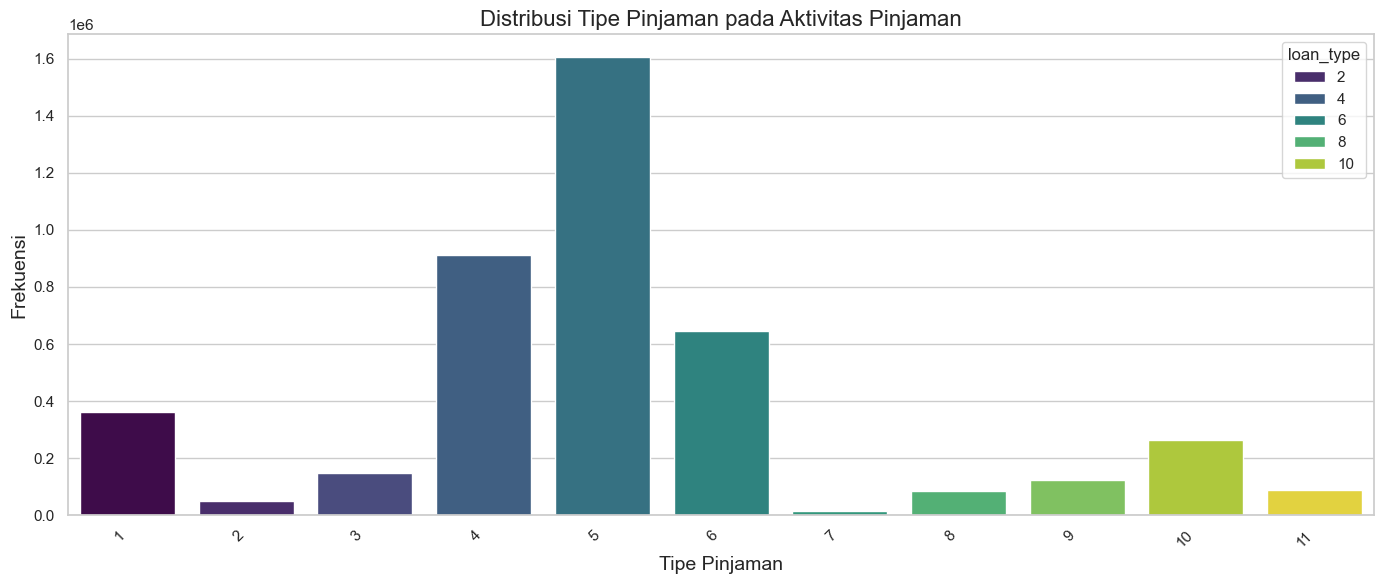

In [13]:
sns.set(style="whitegrid")

value_counts = loan['loan_type'].value_counts()

columns = value_counts.index
counts = value_counts.values

plt.figure(figsize=(14, 6))

bar_plot = sns.barplot(x=columns, hue=columns, y=counts, palette="viridis")

plt.title('Distribusi Tipe Pinjaman pada Aktivitas Pinjaman', fontsize=16)
plt.xlabel('Tipe Pinjaman', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Mayoritas pengguna melakukan peminjaman bertipe 5, 4, dan 6 sedangkan paling minim pengguna melakukan peminjaman bertipe 2 dan 7

In [14]:
train['src'] = 0
test['src'] = 1
non_borrow['src'] = 2
full = pd.concat([train, test, non_borrow])
full_sorted = full.copy().reset_index().drop('index', axis=1)
full_sorted['idx'] = full_sorted.index
full_sorted = full_sorted.sort_values(by='user_id').reset_index().drop('index', axis=1)
pdf = pd.merge(full_sorted, loan, on='user_id', how='outer')
pdf.fillna(-1, inplace=True)
pdf = pdf.sort_values(by='idx')
train_result = pdf[pdf['src'] == 0].drop(columns=['src']).reset_index(drop=True)
test_result = pdf[pdf['src'] == 1].drop(columns=['src']).reset_index(drop=True)
non_borrowed_result = pdf[pdf['src'] == 2].drop(columns=['src']).reset_index(drop=True)
train_result.to_csv('train_loan.csv', index=False)
test_result.to_csv('test_loan.csv', index=False)
non_borrowed_result.to_csv('non_loan.csv', index=False)

train_result = train_result.drop(['pc0','pc10','idx'],axis=1)
non_borrowed_result = non_borrowed_result.drop(['pc0','pc10','idx'],axis=1)
test_result = test_result.drop(['pc0','pc10','idx','label'],axis=1)

combined_df = pd.concat([train_result, non_borrowed_result, test_result], ignore_index=True)

pc_columns = [f'pc{i}' for i in range(1, 10)] + [f'pc{i}' for i in range(11, 17)]

unique_combined_df = combined_df.groupby('user_id')[pc_columns].mean().reset_index()

user_pc_map = unique_combined_df.set_index('user_id')[pc_columns].to_dict(orient='index')

def get_reference_pc_values(ref_contact):
    return user_pc_map.get(ref_contact, {col: -1 for col in pc_columns})

for col in pc_columns:
    combined_df[f'ref_{col}'] = combined_df['reference_contact'].apply(lambda x: get_reference_pc_values(x)[col])

combined_df.loc[combined_df.index < len(train_result), 'set'] = 'train'
combined_df.loc[(combined_df.index >= len(train_result)) & (combined_df.index < len(train_result) + len(non_borrowed_result)), 'set'] = 'non_borrowed'
combined_df.loc[combined_df.index >= len(train_result) + len(non_borrowed_result), 'set'] = 'test'

train_result_updated = combined_df[combined_df['set'] == 'train'].drop(columns=['set'])
non_borrowed_result_updated = combined_df[combined_df['set'] == 'non_borrowed'].drop(columns=['set'])
test_result_updated = combined_df[combined_df['set'] == 'test'].drop(columns=['set'])

loan_type_counts = test_result_updated['loan_type'].value_counts()

best_rows = {}

for idx, row in test_result_updated.iterrows():
    user_id = row['user_id']
    ts = row['ts']
    loan_type = row['loan_type']
    
    if user_id not in best_rows:
        best_rows[user_id] = row
    else:
        current_best_row = best_rows[user_id]
        
        if ts > current_best_row['ts']:
            best_rows[user_id] = row
        elif ts == current_best_row['ts']:
            if loan_type_counts[loan_type] < loan_type_counts[current_best_row['loan_type']]:
                best_rows[user_id] = row

final_test_result = pd.DataFrame.from_dict(best_rows, orient='index')

final_test_result = final_test_result.reset_index(drop=True)

final_test_result = final_test_result.sort_values(by='user_id')

final_test_result = final_test_result.reindex(test_result.index)

final_test_result = final_test_result.dropna(how='all')

**Penjelasan Langkah-langkah Pemrosesan Data**

1. **Menambahkan Sumber Dataset**:
   - Menambahkan kolom reference contact `src` untuk menandai sumber dataset (train, test, non_borrow).
   - Menggabungkan ketiga dataset menjadi satu DataFrame.

2. **Mengurutkan Data dan Menambahkan Indeks**:
   - Menyalin dan mengurutkan DataFrame berdasarkan `user_id`.
   - Menambahkan kolom `idx` sebagai indeks.

3. **Menggabungkan dengan Data Pinjaman**:
   - Menggabungkan DataFrame dengan data pinjaman berdasarkan `user_id`.
   - Mengisi nilai NaN dengan -1 dan mengurutkan kembali berdasarkan `idx`.

4. **Membagi Kembali Data ke dalam Dataset Asli**:
   - Membagi kembali DataFrame yang digabungkan menjadi tiga dataset asli (train, test, non_borrow).
   - Menyimpan hasilnya ke file CSV.

5. **Menghapus Kolom Tertentu**:
   - Menghapus kolom `pc0`, `pc10`, dan `idx` dari dataset train, test, dan non_borrow.

6. **Menggabungkan Kembali Dataset**:
   - Menggabungkan kembali dataset menjadi satu DataFrame untuk pemrosesan lebih lanjut.

7. **Menghitung Nilai Rata-rata Fitur**:
   - Menghitung nilai rata-rata fitur `pc` untuk setiap `user_id` dan membuat peta nilai rata-rata tersebut.

8. **Menambahkan Nilai Fitur Referensi**:
   - Menambahkan kolom baru dengan nilai fitur `pc` dari `reference_contact` untuk setiap baris dalam DataFrame.

9. **Menandai Set Data**:
   - Menandai baris dataset yang berasal dari `train`, `non_borrow`, dan `test` menggunakan kolom `set`.

10. **Membagi Kembali Dataset yang Diperbarui**:
    - Membagi kembali DataFrame yang diperbarui menjadi tiga dataset berdasarkan nilai `set` yang telah ditandai sebelumnya.

11. **Memilih Baris Terbaik dari Test Dataset**:
    - Menghitung frekuensi tipe pinjaman dalam dataset test.
    - Memilih baris terbaik untuk setiap `user_id` berdasarkan timestamp dan frekuensi tipe pinjaman.
    - Membuat DataFrame akhir dari baris terbaik, mengurutkan berdasarkan `user_id`, dan menghapus baris yang kosong.

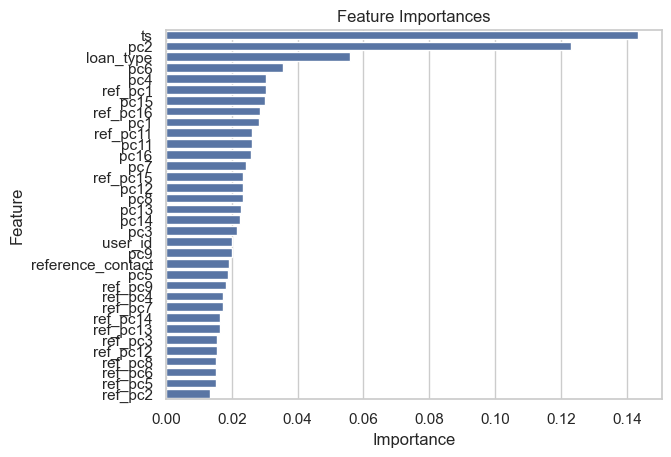

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label
X = train_result_updated.drop(columns=['label',])
y = train_result_updated['label']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Mendapatkan feature importances
importances = model.feature_importances_

# Membuat DataFrame untuk visualisasi
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

1. **Memisahkan Fitur dan Label**:
   - `X` berisi fitur-fitur tanpa label.
   - `y` adalah kolom label (indikator penipuan).

2. **Membagi Data**:
   - Membagi data menjadi set pelatihan dan set pengujian dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian.

3. **Membuat dan Melatih Model**:
   - Membuat model `XGBClassifier` dan melatihnya dengan data pelatihan (`X_train` dan `y_train`).

4. **Mendapatkan Feature Importance**:
   - Mengambil nilai pentingnya setiap fitur dari model yang dilatih.

# Pemrosesan Data

<div font="" style="text-align: justify">Karena pada kompetisi ini tidak seperti lomba-lomba lainnya yang sekedar menggunakan data tabular, di sini kami menggunakan teknik graph untuk melakukan analisis dan deteksi penipuan. Teknik graph memungkinkan kita untuk memodelkan hubungan antar user dan aktivitas mereka dalam bentuk node dan edge, yang dapat memberikan wawasan lebih mendalam mengenai pola-pola penipuan.</div>

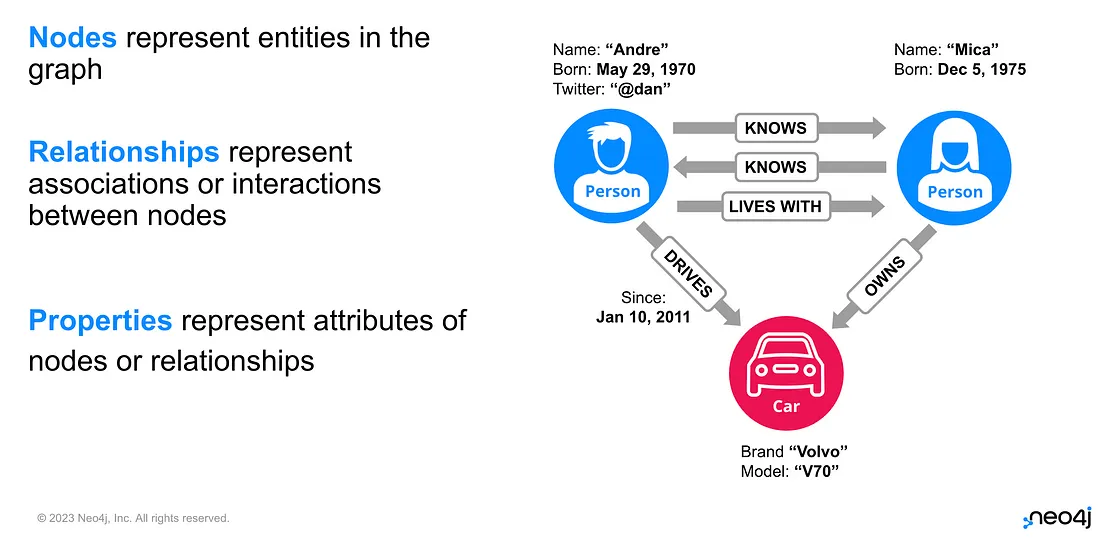

**Mengapa menggunakan graph?**
<div font="" style="text-align: justify">Graph adalah representasi yang kuat untuk memodelkan data di mana hubungan antara nodenya sangat penting. Dalam kasus ini, pengguna (user) dan referensi kontak mereka dapat diwakili sebagai node, sementara fitur - fitur lainnya dapat diwakili sebagai edge. Dengan menggunakan graph, kita dapat mengidentifikasi komunitas, mengukur pengaruh pengguna, dan mendeteksi pola-pola penipuan yang mungkin tersembunyi dalam data tabular biasa.</div>

### Menambahkan Label dan Tipe pada Dataset
- Menambahkan label -1 pada dataset non_borrow dan test untuk membedakan dari train.
- Menambahkan kolom tipe untuk membedakan antara borrower (1), non-borrower (0), dan non-user (-1).

In [ ]:
non_borrow['label'] = -1
test['label'] = -1

train['tipe'] = 1
test['tipe'] = 1
non_borrow['tipe'] = 0

### Menggabungkan Dataset menjadi Satu
- Menggabungkan semua dataset (train, test, non_borrow) menjadi satu dataset df.
- Membuat DataFrame dengan user_id dari 0 hingga 3700549 untuk mencakup semua pengguna.
- Menggabungkan dengan dataset awal dan mengisi nilai yang hilang dengan -1.

In [ ]:
df = pd.concat([train, test, non_borrow])
df = df.sort_values(by='user_id').reset_index(drop=True)

all_user_ids = pd.DataFrame({'user_id': np.arange(3700550)})

dfc = pd.merge(all_user_ids, df, on='user_id', how='left')
dfc = dfc.fillna(-1)

### Menaikkan Semua Fitur dengan 1
Hal ini dilakukan untuk mempermudah agregasi node pada graph nantinya.

In [ ]:
for col in dfc.columns.tolist():
    if col == 'user_id' or col == 'label':
        print('lanjut')
        continue
    dfc[col] = dfc[col] + 1

### Menghitung Borrower dan Reference Counts
- Menghitung jumlah kemunculan setiap user_id sebagai peminjam dan referensi.
- Menambahkan hasil perhitungan ini ke dalam dataset dfc.

In [ ]:
# Hitung banyaknya kemunculan setiap user_id sebagai peminjam
borrower_counts = loan['user_id'].value_counts().reset_index()
borrower_counts.columns = ['user_id', 'borrower_count']

# Hitung banyaknya kemunculan setiap user_id sebagai reference
reference_counts = loan['reference_contact'].value_counts().reset_index()
reference_counts.columns = ['user_id', 'reference_count']

# Gabungkan hasil perhitungan ke dalam dataset dfc
dfc = dfc.merge(borrower_counts, on='user_id', how='left')
dfc = dfc.merge(reference_counts, on='user_id', how='left')

# Ganti NaN dengan 0 (untuk user_id yang tidak muncul sebagai peminjam atau reference)
dfc['borrower_count'] = dfc['borrower_count'].fillna(0).astype(int)
dfc['reference_count'] = dfc['reference_count'].fillna(0).astype(int)

### Membuat Kebalikan dari Loan untuk Mengubah Directed Edge menjadi Undirected

In [ ]:
# Membuat kebalikan dari loan
rloan = loan.copy()
rloan['temp'] = rloan['user_id']
rloan['user_id'] = rloan['reference_contact']
rloan['reference_contact'] = rloan['temp']
rloan.drop(columns='temp', inplace=True)

### Pembentukan Graf

Setelah pemrosesan data dilakukan pada data tabular. Selanjutnya adalah proses pengubahan data menjadi graf data. Graf data dapat dibentuk dari dataset yang ada karena terdapat unsur-unsur graf pada dataset sebagai berikut.

1. Node (Vertex):
Merupakan titik dalam graf yang mewakili suatu entitas. Dalam graf, setiap node biasanya memiliki fitur atau atribut yang mengandung informasi tertentu tentang node tersebut. Pada konteks dataset ini, Node merepresentasikan suatu user. 
2. Edge (Sisi):
Merupakan hubungan atau koneksi antara dua node. Edges bisa bersifat berarah (directed) atau tidak berarah (undirected). Dalam kasus ini, edge adalah hubungan "mereferensikan" yang terbentuk dari seorang peminjam yang mereferensikan user_id seseorang lainnya.
3. Node Features (Fitur Node):
Setiap node biasanya memiliki vektor fitur yang menggambarkan karakteristik dari node tersebut. Fitur-fitur ini digunakan oleh GNN untuk mempelajari representasi dari node tersebut. Tentu saja dalam dataset ini, fitur node adalah 'pc0'-'pc16' dan frekuensi peminjaman serta frekuensi direferensikan.
4. Edge Features (Fitur Edge):
Sama seperti node, setiap edge juga bisa memiliki fitur yang menggambarkan karakteristik dari hubungan antara dua node yang dihubungkan oleh edge tersebut. Adapun dalam dataset ini, 'loan_type' dan 'ts' adalah edge features-nya.

In [ ]:
class Dataset(DGLDataset):
    def __init__(self):
        super().__init__(name='dataset_datathon')

    def process(self):
        nodes_data = dfc
        edges_data = pd.concat([loan, rloan])
        node_features = torch.from_numpy(nodes_data[[
                                                    'pc1', 'pc2', 'pc3', 
                                                     'pc4', 'pc5', 'pc6', 
                                                     'pc7', 'pc8', 'pc9', 
                                                     'pc11', 'pc12', 'pc13', 
                                                     'pc14', 'pc15', 'pc16', 'tipe',
                                                    'borrower_count','reference_count'
        ]].to_numpy())
        
        node_labels = torch.from_numpy(nodes_data['label'].to_numpy())
        edge_features = torch.from_numpy(edges_data[['loan_type', 'ts']].to_numpy())
        edges_src = torch.from_numpy(edges_data['reference_contact'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['user_id'].to_numpy())

        self.graph = dgl.graph((edges_src, edges_dst), num_nodes=nodes_data.shape[0])
        self.graph.ndata['feat'] = node_features
        self.graph.ndata['label'] = node_labels
        self.graph.edata['weight'] = edge_features

        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.ones(n_nodes, dtype=torch.bool)
        val_mask = torch.ones(n_nodes, dtype=torch.bool)
        test_mask = torch.ones(n_nodes, dtype=torch.bool)
        
        test_mask[:n_train] = False
        val_mask[:n_train] = False
        train_mask[n_train:n_train + n_val] = False
        test_mask[n_train:n_train + n_val] = False
        train_mask[n_train + n_val:] = False
        val_mask[n_train + n_val:] = False
        
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask
        
        mask_indices = (node_labels == -1)
        train_mask[mask_indices] = False
        val_mask[mask_indices] = False
        test_mask[mask_indices] = False
        
        out_mask = torch.zeros(n_nodes, dtype=torch.bool)
        out_mask[mask_indices] = True
        self.graph.ndata['out_mask'] = out_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1

dataset = Dataset()
graph = dataset[0]
print(graph)

Dalam pembentukan dataset graf, kami menggunakan library dgl sebagai tools. Kami melakukan kontruksi dataset dengan node, edge, node features, dan edge features. Kami juga menggambarkan hubungan antar node dengan edge list. Setelah itu, kami memecah dataset untuk proses modelling.

# Modelling

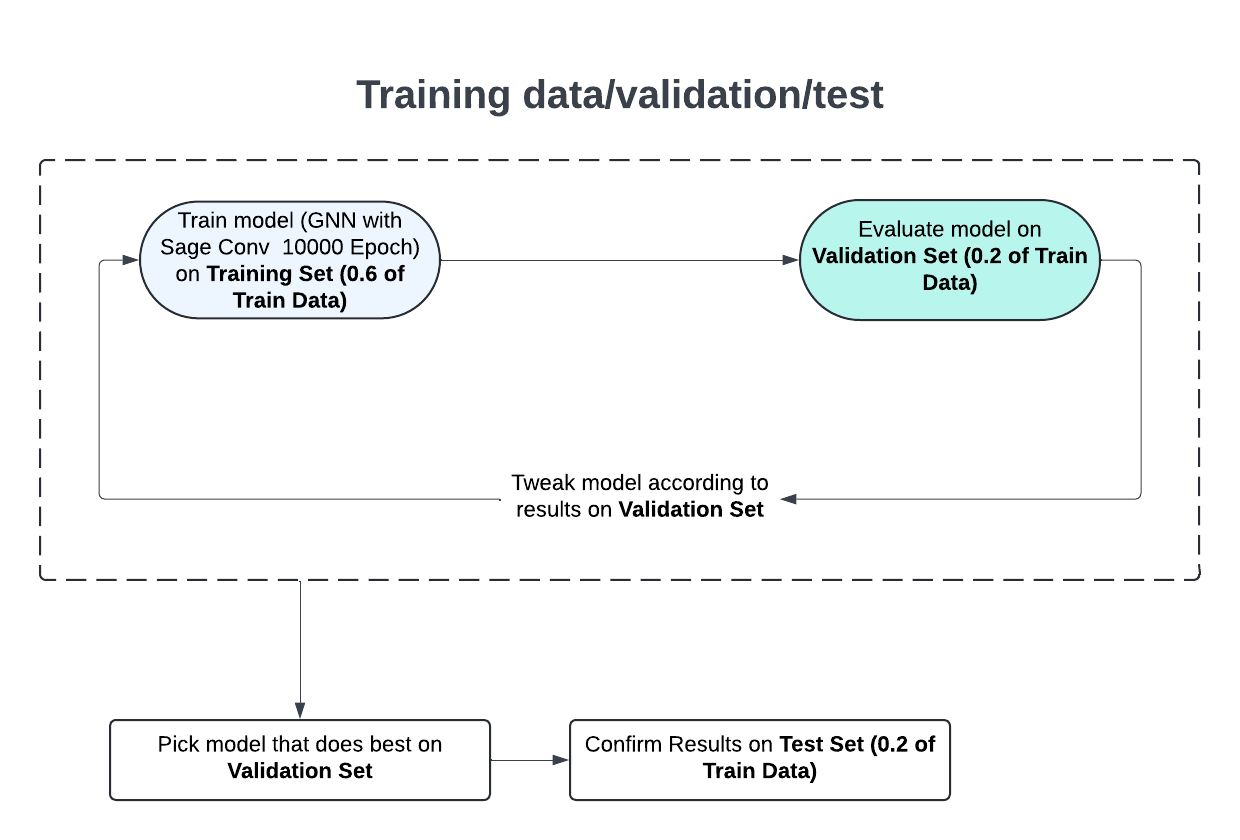

### Metrik Penilaian

<div font="" style="text-align: justify">Pada perlombaan ini metrik yang digunakan adalah metrik Average Precision karena metrik ini sangat berguna dalam situasi di mana keseimbangan antara presisi dan recall sangat penting. Pada intinya, perlombaan ini mendeteksi fraud dan non-fraud, dan dalam konteks deteksi fraud, kesalahan prediksi yang mengklasifikasikan transaksi fraud sebagai non-fraud dapat memiliki konsekuensi serius.</div>

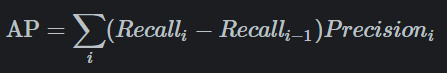

**Di mana**:
- Precision-i adalah precision pada ambang batas ke-i
- Recall-i adalah recall pada ambang batas ke-i
- i mewakili berbagai ambang batas di mana precision dan recall dievaluasi

**Mengapa Menggunakan Average Precision (AP)?**

**1. Mengatasi Ketidakseimbangan Data:**
   Data penipuan seringkali sangat tidak seimbang. AP memberikan gambaran yang lebih baik tentang kinerja model pada kelas minoritas (penipuan) dibandingkan metrik seperti akurasi.

**2. Evaluasi di Berbagai Threshold:**
   Dalam deteksi penipuan, penting untuk memahami trade-off antara precision dan recall di berbagai ambang batas. AP mempertimbangkan kinerja model di berbagai threshold, memberikan pandangan yang lebih menyeluruh.

**3. Fokus pada Kinerja Kelas Positif:**
   Deteksi penipuan memerlukan fokus pada kelas positif untuk memastikan kasus penipuan terdeteksi dengan benar. AP menekankan kinerja model dalam memprediksi penipuan, bukan hanya transaksi normal.

**4. Menggabungkan Precision dan Recall:**
   AP menggabungkan kedua metrik ini dalam satu nilai, memberikan keseimbangan yang baik antara keduanya dan memastikan hasil yang andal.

**5. Luas di Bawah Kurva Precision-Recall:**
   AP sebagai luas di bawah kurva Precision-Recall memberikan indikator yang jelas tentang kinerja model secara keseluruhan, memudahkan perbandingan antara model yang berbeda.

### Tree - Not Used

In [ ]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import make_scorer, average_precision_score
# from sklearn.datasets import make_classification
# from sklearn.ensemble import VotingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# X = train_result_updated.drop(columns=['label'])
# y = train_result_updated['label']

# xgb = XGBClassifier(
#     **{
#         "colsample_bytree": 0.5920623339546657,
#         "learning_rate": 0.05655179773541492,
#         "max_depth": 8,
#         "n_estimators": 477,
#         "gamma": 0.6651835678620678,
#         "min_child_weight": 1.561555677120107,
#         "alpha": 0.131264100671468,
#         "lambda": 0.4116178861256159,
#     }
# )

# cb = CatBoostClassifier(
#     **{
#         "iterations": 715,
#         "depth": 9,
#         "learning_rate": 0.21685466614525384,
#         "l2_leaf_reg": 46.80107916663932,
#         "min_child_samples": 5,
#         "border_count": 40,
#     }
# )

# lgb = LGBMClassifier(
#     **{
#         "max_depth": 20,
#         "lambda_l1": 0.00016628985509900782,
#         "lambda_l2": 0.002837398285557587,
#         "min_split_gain": 0.7577793742601943,
#         "min_child_weight": 9.419284482047434,
#         "colsample_bytree": 0.7269574870557697,
#         "subsample": 0.272828878529134,
#         "reg_alpha": 6.174076387406154,
#         "reg_lambda": 6.096821117413743,
#         "n_estimators": 217,
#     }
# )

# under_sampler = RandomUnderSampler(sampling_strategy={0: int(0.08 * np.sum(y == 0))}, random_state=42)

# voting_clf = VotingClassifier(
#     estimators=[
#         ('xgb', xgb),
#         ('cb', cb),
#         ('lgb',lgb)
#     ],
#     voting='soft'
# )

# pipeline = Pipeline(steps=[('under_sampler', under_sampler), ('voting_clf', voting_clf)])

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scorer = make_scorer(average_precision_score, needs_proba=True)

# scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scorer)

# print(f"Average Precision Score for each fold: {scores}")
# print(f"Mean Average Precision Score: {np.mean(scores)}")

1. **Pisahkan Fitur dan Label**:
   - `X` adalah fitur-fitur tanpa label.
   - `y` adalah kolom label (indikator penipuan).

2. **Definisi Model**:
   - Menyiapkan model `XGBClassifier`, `CatBoostClassifier`, dan `LGBMClassifier` dengan parameter khusus.

3. **Under-sampling**:
   - Menggunakan `RandomUnderSampler` untuk menyeimbangkan jumlah sampel antara kelas mayoritas dan minoritas.

4. **Voting Classifier**:
   - Membuat `VotingClassifier` untuk menggabungkan ketiga model dengan metode voting 'soft'.

5. **Pipeline**:
   - Membuat pipeline yang mengaplikasikan under-sampling terlebih dahulu, kemudian voting classifier.

6. **Cross-Validation**:
   - Menggunakan `StratifiedKFold` untuk memastikan proporsi kelas yang seimbang di setiap fold.
   - `cross_val_score` digunakan untuk menghitung Average Precision Score di setiap fold.

7. **Hasil**:
   - Average Precision Score for each fold: [0.04854822 0.0540557  0.04929805 0.05011996 0.04614127]
   - Mean Average Precision Score: 0.04963264117912762

In [ ]:
# voting_clf.fit(X,y)
# pred = voting_clf.predict_proba(final_test_result.drop(columns=['label']))[:,1]
# sample['label'] = pred

1. Melatih voting classifier menggunakan dataset pelatihan `X` (fitur) dan `y` (label).

2. Membuat prediksi probabilitas untuk dataset uji dan hanya mengambil probabilitas kelas 1 (penipuan).

3. Mengisi kolom `label` pada DataFrame `sample` dengan hasil prediksi probabilitas.

### Graph Neural Network (GNN) - Used

Graph Neural Network atau biasa disingkat GNN adalah sebuah arsitektur neural network yang menggunakan graph sebagai kerangka utama. GNN menerima graph dan fitur-fiturnya untuk kemudian dapat dilakukan perhitungan weight and biases. GNN memiliki banyaknya kegunaan dikarenakan manfaatnya yang besar untuk merepresentasikan hubungan dari tiap-tiap nodes. Dalam kasus ini, task yang dilakukan adalah *Node Classification*, mengklasifikasi apakah sebuah user fraud atau non fraud.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

In [ ]:
# graph = dgl.add_self_loop(graph)

node_features = graph.ndata['feat'].to(device)
node_labels = graph.ndata['label'].to(device)
train_mask = graph.ndata['train_mask'].to(device)
valid_mask = graph.ndata['val_mask'].to(device)
test_mask = graph.ndata['test_mask'].to(device)
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

graph = graph.to(device)

Kami memasukkan model dan dataset ke CUDA agar proses pemodelan lebih cepat.

### SAGEConv

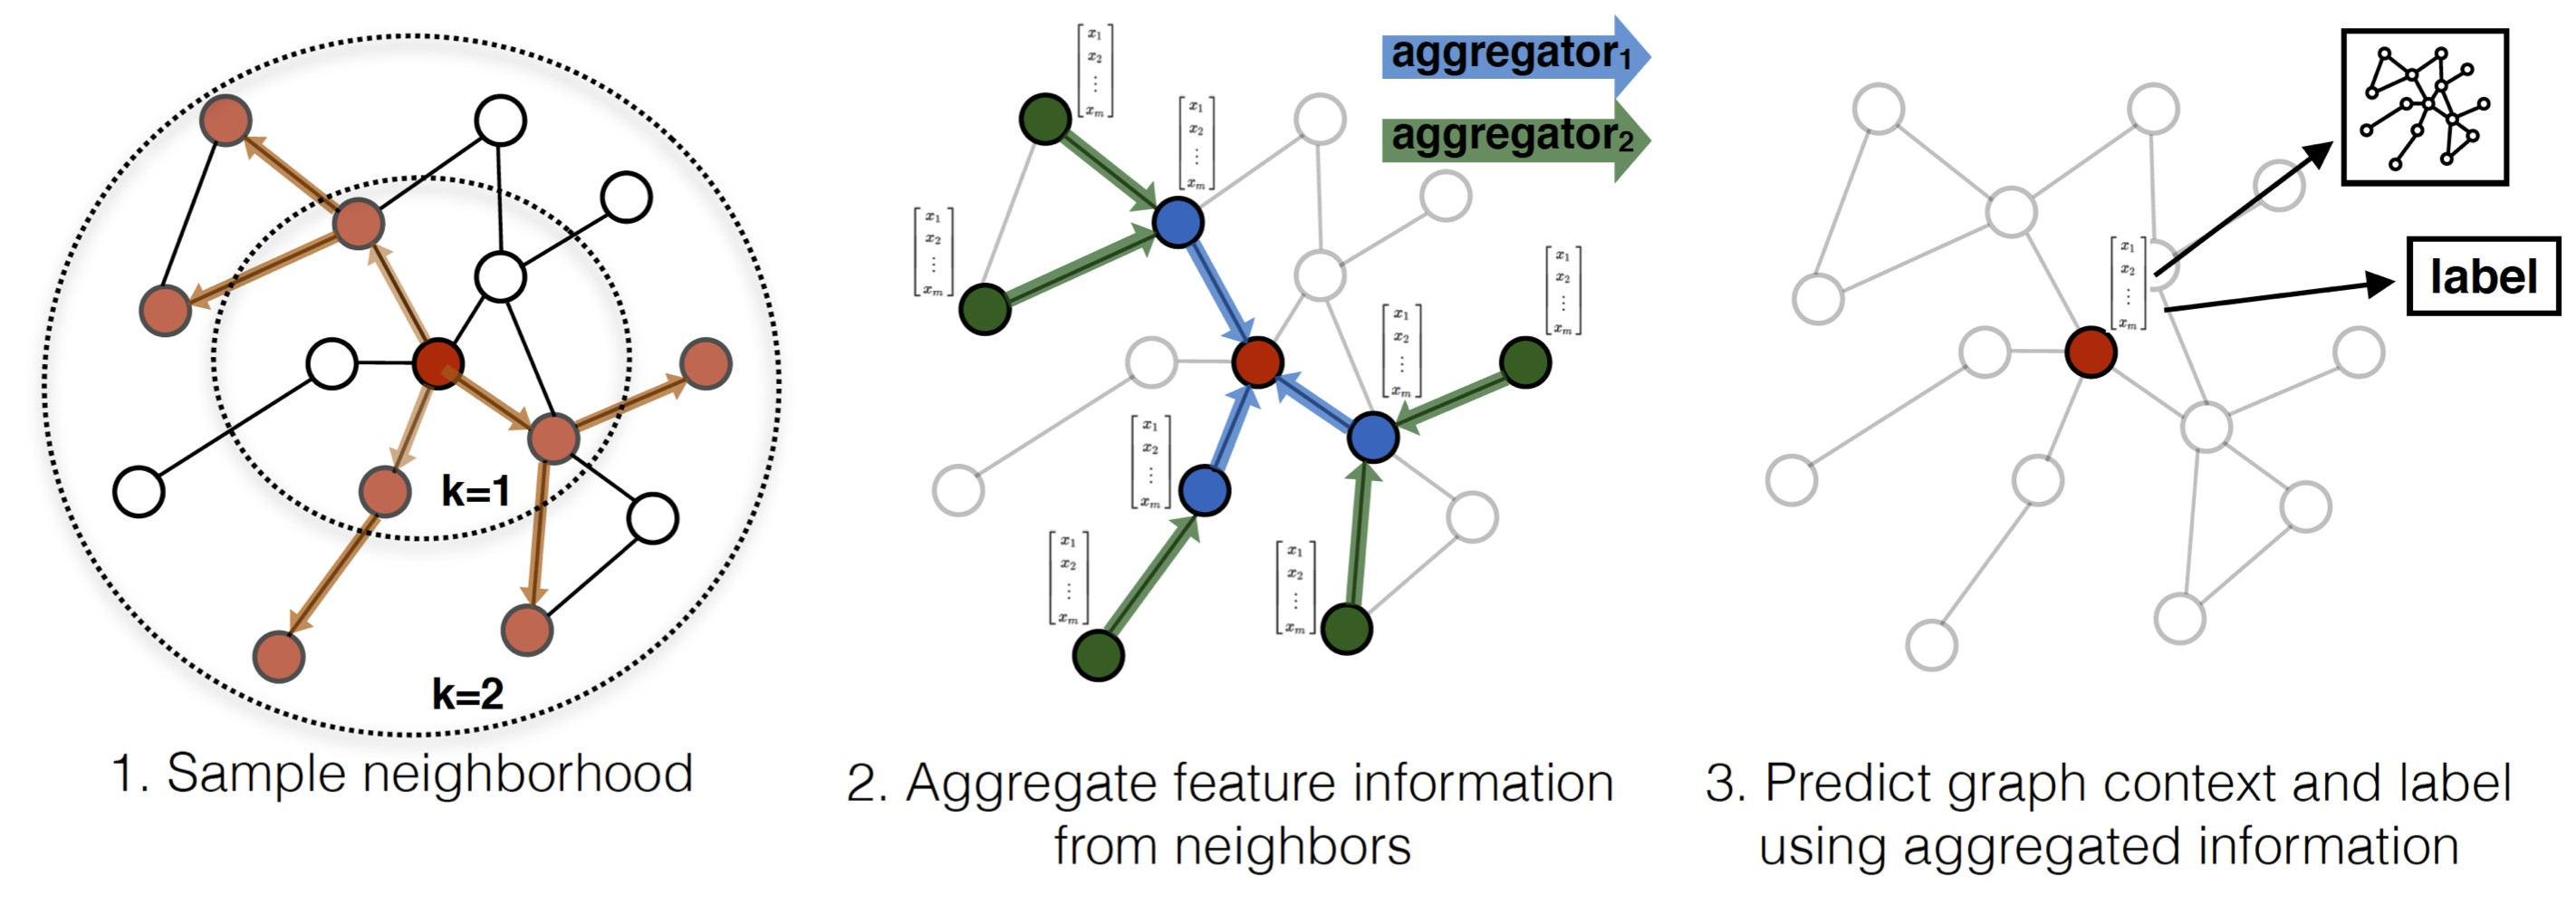

SAGE (Sample and Aggregation) Convolution adalah salah satu varian dari Graph Convolutional Network (GCN) yang dikembangkan untuk menangani masalah skala besar dan sparsitas pada graf. SAGE Convolution, atau GraphSAGE (Graph Sample and Aggregation), memperkenalkan metode untuk secara efisien mengagregasi informasi dari tetangga node yang dipilih secara acak (sampling).

### Proses SAGE Convolution:

1. **Sampling**:
   - Pada setiap layer, GraphSAGE memilih sejumlah tetap tetangga untuk setiap node secara acak. Ini membantu dalam menangani graf yang sangat besar dengan menghindari komputasi penuh pada seluruh tetangga.

2. **Aggregation**:
   - GraphSAGE menggabungkan fitur dari tetangga-tetangga yang dipilih menggunakan fungsi agregasi yang telah ditentukan sebelumnya. Kami menggunakan aggregasi 'mean' dengan alasan hasil metriks yang lebih baik ketika dibandingkan dengan metode lainnya. Selain itu, aggregasi 'mean' cenderung memiliki computational cost yang lebih sedikit. Dengan itu, kami dapat melakukan stacking Sage Convulution dua layar.

3. **Update**:
   - Setelah agregasi, GraphSAGE memperbarui fitur node dengan menggabungkan fitur node itu sendiri dengan hasil dari agregasi tetangganya.

### Kesimpulan GraphSAGE:
GraphSAGE merupakan pendekatan yang efisien untuk menangani graf berskala besar dengan menggunakan teknik sampling dan agregasi. Dengan menggabungkan informasi dari tetangga-tetangga yang dipilih secara acak, GraphSAGE dapat mempelajari representasi node yang kaya dengan efisiensi komputasi yang lebih baik.

In [ ]:
# Contruct a two-layer GNN model
import dgl.nn as dglnn
import torch.nn as nn
import torch.nn.functional as F
class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats, aggregator_type='mean')
        self.conv2 = dglnn.SAGEConv(
            in_feats=hid_feats, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        return h

In [ ]:
from sklearn.metrics import average_precision_score
import torch.nn.functional as F

def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        
        # Menggunakan softmax untuk mendapatkan probabilitas untuk binary classification
        probs = F.softmax(logits, dim=1)

        # Konversi ke numpy arrays
        probs_np = probs.cpu().numpy()
        labels_np = labels.cpu().numpy()
        
        # Menggunakan average_precision_score
        ap_score = average_precision_score(labels_np, probs_np[:,1])
        
        return ap_score

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Assume node_labels contains the labels for all nodes in the graph
unique_labels = node_labels[train_mask].unique()
class_weights = compute_class_weight('balanced', classes=unique_labels.cpu().numpy(), y=node_labels[train_mask].cpu().numpy())
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device)

Untuk mengatasi imbalance pada dataset, kami menerapkan class weight yang kami hitung dengan memanfaatkan library sklearn. Nantinya class weight akan dimasukkan ke dalam perhitungan cross entropy loss pada model.

In [ ]:
model = SAGE(in_feats=n_features, hid_feats=50, out_feats=n_labels).to(device)
opt = torch.optim.Adam(model.parameters())

for epoch in range(10000):
    model = model.float()
    model.train()
    
    logits = model(graph, node_features.float())
    
    loss = F.cross_entropy(F.log_softmax(logits[train_mask], dim=1), node_labels[train_mask].long(), weight=class_weights)
    
    acc = evaluate(model.float(), graph, node_features.float(), node_labels, valid_mask)
    print(f'acc on epoch {epoch} = {acc}')
    
    opt.zero_grad()
    loss.backward()
    opt.step()
    print(loss.item())


### Proses Submisi

Kami membuat submit mask yang merupakan tensor untuk menunjukkan dataset test. Untuk indeks n, jika user_id = n merupakan anggota dari dataset test, maka submit_mask = True.

In [ ]:
test_nomer = test.user_id
submit_mask = torch.zeros(dfc.shape[0], dtype=torch.bool)
submit_mask[test_nomer] = True

submit_mask.to(device)
model.eval()
with torch.no_grad():
    model = model.float()
    logits = model(graph, node_features.float())
    logits = logits[submit_mask]

    probs = F.softmax(logits, dim=1)[:,1]

sample['label'] = probs.cpu().numpy()
sample.to_csv('submission.csv', index=False)

# Hasil Analisis

<div font="" style="text-align: justify">Setelah seluruh proses selesai, kami mendapatkan test_score sebesar 0.04783980985628732 dan public leaderboard sebesar 0.04565. Tentunya hasil ini masih sangat jauh dari kata sempurna. Salah satu penyebab dari rendahnya skor ini disebabkan karena terlalu banyak null-data pada dataset. Oleh karena itu, model jadi kurang bisa mengidentifikasi keunikan seorang user.</div>